In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Getting data.

In [2]:
data = pd.read_excel(r'C:/Users/91904/Desktop/Projects/Online Retail.xlsx', encoding='unicode_escape')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Checking for missing values.

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Removing all the records having customerID as null.

In [8]:
data = data[data['CustomerID'].notnull()]

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Filtering out negative values present in Quantity and UnitPrice fields.

In [11]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
data = data[data['Quantity'] > 0]

In [13]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [14]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Removing time part form Invoice date field.

In [15]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


Creating new column having total sales.

In [17]:
data['Total_sales'] = data['Quantity'] * data['UnitPrice']

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [19]:
data.shape

(397924, 9)

Customer distribution by country.

In [20]:
country_data = data[['CustomerID','Country']].drop_duplicates()

In [21]:
country_data.groupby(country_data['Country'])['CustomerID'].aggregate('count').sort_values(ascending=False)

Country
United Kingdom          3921
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Denmark                    9
Australia                  9
Netherlands                9
Cyprus                     8
Japan                      8
Sweden                     8
Poland                     6
Unspecified                4
Greece                     4
USA                        4
Canada                     4
Israel                     3
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Czech Republic             1
Singapore                  1
Lithuania                  1
Saudi Arabia               1
Brazil                     1
RSA                        1
Icelan

We can see majority of our records are from united kingdom and rest other countries are very less in number. This will make our dataset imbalanced. So, we will keep only the United Kingdom records.

In [22]:
data = data.query("Country == 'United Kingdom'")

In [23]:
data['Country'].nunique()

1

In [24]:
data['Country'].value_counts()

United Kingdom    354345
Name: Country, dtype: int64

RFM modelling.

In [25]:
import datetime as dt

In [26]:
data['InvoiceDate'].max()

datetime.date(2011, 12, 9)

In [27]:
latest_date = dt.date(2011,12,9)

In [28]:
rfm_data = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days,
                                           'InvoiceNo': lambda x: len(x), 'Total_sales': lambda x: x.sum()})

In [29]:
rfm_data.head()

,InvoiceDate,InvoiceNo,Total_sales
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [30]:
rfm_data.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequecy',
                         'Total_sales':'Monetary'}, inplace=True)

In [31]:
rfm_data.head()

,Recency,Frequecy,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [32]:
rfm_data.describe()

,Recency,Frequecy,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


In [33]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
Recency     3921 non-null int64
Frequecy    3921 non-null int64
Monetary    3921 non-null float64
dtypes: float64(1), int64(2)
memory usage: 122.5 KB


Plotting recency distribution.

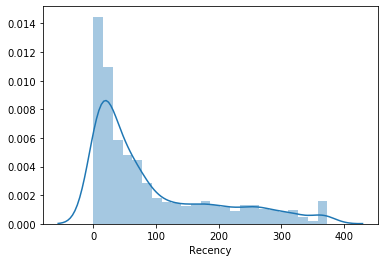

In [34]:
sns.distplot(rfm_data['Recency'])

Plotting frequecy distribution.

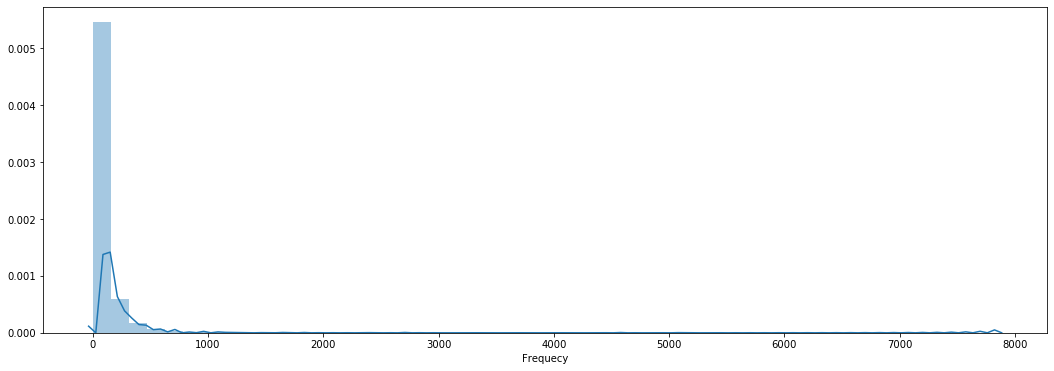

In [36]:
plt.figure(figsize=(18,6))
sns.distplot(rfm_data['Frequecy'])
plt.show()

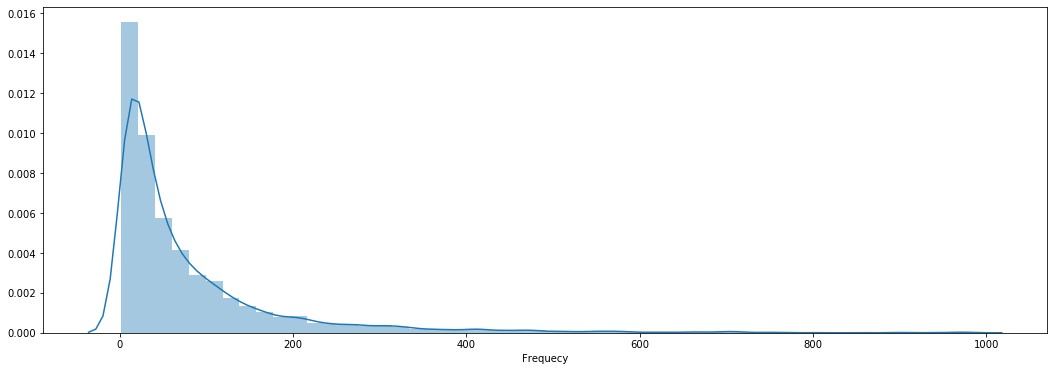

In [37]:
x = rfm_data[rfm_data['Frequecy'] < 1000]
plt.figure(figsize=(18,6))
sns.distplot(x['Frequecy'],bins=50)
plt.show()

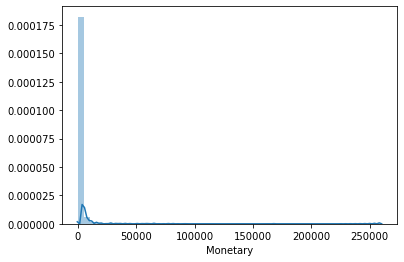

In [38]:
sns.distplot(rfm_data['Monetary'])

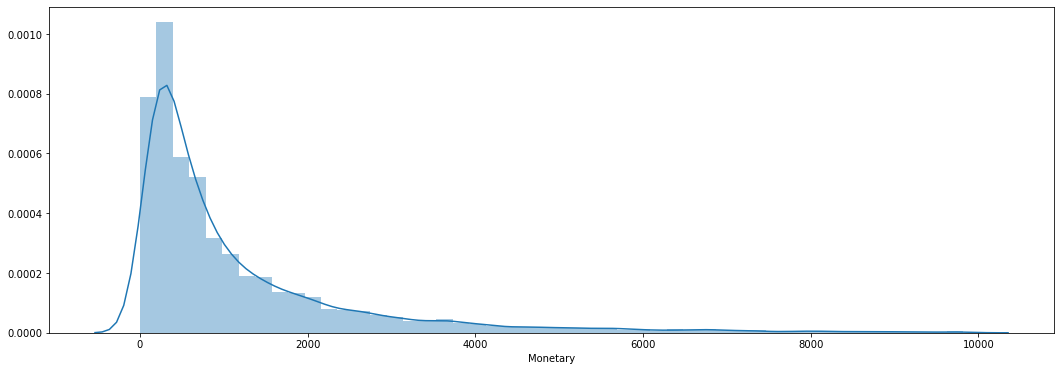

In [39]:
x=rfm_data[rfm_data['Monetary'] < 10000]
plt.figure(figsize=(18,6))
sns.distplot(x['Monetary'], bins=50)
plt.show()

All three are right skewed.

Splitting our data into 4 segments using quantile.

In [40]:
quantile = rfm_data.quantile(q=[0.25,0.5,0.75])

In [41]:
quantile = quantile.to_dict()

In [42]:
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequecy': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

Creating recency, frequency and monetary segments.

In [43]:
def rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [44]:
def Fnmscoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 1

In [45]:
rfm_data['R'] = rfm_data['Recency'].apply(rscoring,args=('Recency',quantile,))

In [46]:
rfm_data.head()

,Recency,Frequecy,Monetary,R
CustomerID,,,,
12346.0,325,1,77183.60,4
12747.0,2,103,4196.01,1
12748.0,0,4596,33719.73,1
12749.0,3,199,4090.88,1
12820.0,3,59,942.34,1


In [47]:
rfm_data['F'] = rfm_data['Frequecy'].apply(Fnmscoring, args=('Frequecy',quantile,))
rfm_data['M'] = rfm_data['Monetary'].apply(Fnmscoring, args=('Monetary',quantile,))

In [48]:
rfm_data.head()

,Recency,Frequecy,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,3,3


Calculating RFM scores for each customer.

In [49]:
rfm_data['RFM_scores'] = rfm_data[['R','F','M']].sum(axis=1)

In [50]:
rfm_data.head()

,Recency,Frequecy,Monetary,R,F,M,RFM_scores
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,9
12747.0,2,103,4196.01,1,1,1,3
12748.0,0,4596,33719.73,1,1,1,3
12749.0,3,199,4090.88,1,1,1,3
12820.0,3,59,942.34,1,3,3,7


# K-means clustering.

From the above visualisation of receny, frequency and monetary we know that they are right skewed distributed. In order to perform K-means clustering we need to convert them in normal distribution. We will use log transformation technique for this.

In [54]:
def neg_zero(x):
    if x <= 0:
        return 1
    else:
        return x

In [55]:
rfm_data['Recency'] = [neg_zero(x) for x in rfm_data.Recency]
rfm_data['Monetary'] = [neg_zero(x) for x in rfm_data.Monetary]

In [57]:
log_tf_data = rfm_data[['Recency','Frequecy','Monetary']].apply(np.log, axis=1).round(3)

In [60]:
log_tf_data.head()

,Recency,Frequecy,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12747.0,0.693,4.635,8.342
12748.0,0.000,8.433,10.426
12749.0,1.099,5.293,8.317
12820.0,1.099,4.078,6.848


Plotting recency distribution.

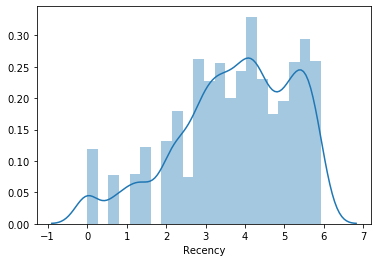

In [61]:
sns.distplot(log_tf_data.Recency)

Plotting frequecy distribution.

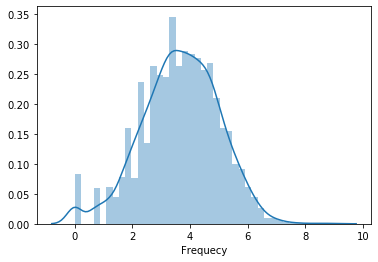

In [62]:
sns.distplot(log_tf_data.Frequecy)

Plotting monetary distribution.

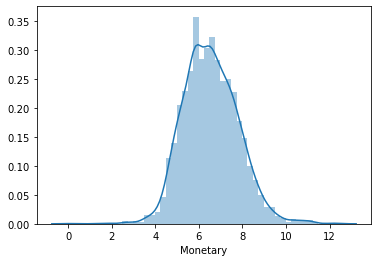

In [63]:
sns.distplot(log_tf_data.Monetary)

Using standard scaler to bring all the data points at same scale.

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

In [66]:
scale_data = sc.fit_transform(log_tf_data)

In [67]:
scale_data

array([[ 1.38997120e+00, -2.73363871e+00,  3.76641487e+00],
       [-2.06118918e+00,  7.26977680e-01,  1.43900901e+00],
       [-2.53097000e+00,  3.56266723e+00,  3.10463875e+00],
       ...,
       [-1.21178750e+00, -8.78270484e-01, -1.08660999e+00],
       [-1.78596406e+00,  2.21500540e+00,  8.83532679e-01],
       [ 2.99926346e-03,  4.38033010e-01,  7.78831385e-01]])

In [69]:
scale_data = pd.DataFrame(scale_data, index = rfm_data.index, columns = log_tf_data.columns)

In [70]:
scale_data.head()

,Recency,Frequecy,Monetary
CustomerID,,,
12346.0,1.389971,-2.733639,3.766415
12747.0,-2.061189,0.726978,1.439009
12748.0,-2.530970,3.562667,3.104639
12749.0,-1.785964,1.218258,1.419028
12820.0,-1.785964,0.311106,0.244935


In [71]:
from sklearn.cluster import KMeans

In [72]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(scale_data)
    sum_of_sq_dist[k] = km.inertia_

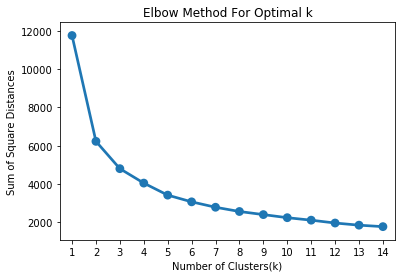

In [73]:
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [74]:
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(scale_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
rfm_data['Cluster'] = KMean_clust.labels_
rfm_data.head()

,Recency,Frequecy,Monetary,R,F,M,RFM_scores,Cluster
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,9,1
12747.0,2,103,4196.01,1,1,1,3,2
12748.0,1,4596,33719.73,1,1,1,3,2
12749.0,3,199,4090.88,1,1,1,3,2
12820.0,3,59,942.34,1,3,3,7,2


Plotting scatter plot for better insights.

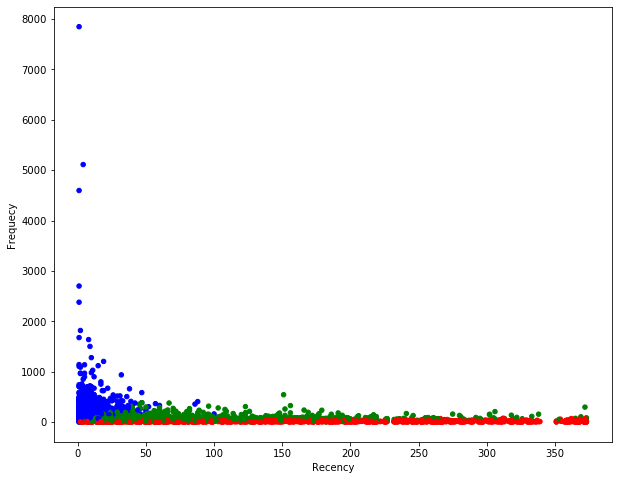

In [78]:
Colors = ["red", "green", "blue"]
rfm_data['Color'] = rfm_data['Cluster'].map(lambda p: Colors[p])
ax = rfm_data.plot(    
    kind="scatter", 
    x="Recency", y="Frequecy",
    figsize=(10,8),
    c = rfm_data['Color'])

In [79]:
rfm_data.head()

,Recency,Frequecy,Monetary,R,F,M,RFM_scores,Cluster,Color
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,9,1,green
12747.0,2,103,4196.01,1,1,1,3,2,blue
12748.0,1,4596,33719.73,1,1,1,3,2,blue
12749.0,3,199,4090.88,1,1,1,3,2,blue
12820.0,3,59,942.34,1,3,3,7,2,blue
